In [1]:
import os
import time
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ENVIRONMENT VARIABLES

with open(".env\.envvars") as file:
    directory = file.readlines()[0].split("=")[1]

directory

'P:\\01-Tecnico\\Analisis de Perturbaciones IDP\\Incidencias (Datos)'

In [3]:
def explore_directory_comtrade(directory):
    cfg_files_list = []
    dat_files_list = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if ".cfg" in filename:
                cfg_files_list.append(os.path.join(dirpath, filename))
            if ".dat" in filename:
                dat_files_list.append(os.path.join(dirpath, filename))
    return cfg_files_list, dat_files_list

In [4]:
def explore_directory_files(directory, text):
    notes_files_list = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if text in filename:
                notes_files_list.append(os.path.join(dirpath, filename))
    return notes_files_list

In [5]:
cfg_files_list, dat_files_list = explore_directory_comtrade(directory=directory)
text_files_list = explore_directory_files(directory=directory, text=".txt")
mails_files_list = explore_directory_files(directory=directory, text=".msg")
docs_files_list = explore_directory_files(directory=directory, text=".doc")
csv_files_list = explore_directory_files(directory=directory, text=".csv")
excel_files_list = explore_directory_files(directory=directory, text=".xls")
cev_files_list = explore_directory_files(directory=directory, text=".cev")
pdf_files_list = explore_directory_files(directory=directory, text=".pdf")

In [6]:
print(len(cfg_files_list))
print(len(dat_files_list))
print(len(text_files_list))
print(len(mails_files_list))
print(len(docs_files_list))
print(len(csv_files_list))
print(len(excel_files_list))
print(len(cev_files_list))
print(len(pdf_files_list))

4300
4649
1570
364
3339
195
5037
15
220


In [9]:
def auxiliary_function(*args, file: str, data_dict: dict):
    for arg in args:
        if f".{arg}" in file:
            data_dict[arg].append(1)
        else:
            data_dict[arg].append(0)

In [10]:
def building_data(directory):
    keys_1 = ["Year", "Folder"]
    keys_2 = ["cfg", "dat", "txt", "msg", "doc", "csv", "xls", "pdf"]
    data_dict = {value: [] for value in keys_1 + keys_2}

    for dirpath, dirnames, filenames in os.walk(directory):        
        for filename in filenames:
            if directory + r"\20" in dirpath:
                year = dirpath.split("\\")[4]

                try:
                    folder = dirpath.split("\\")[5]
                except IndexError:
                    folder = "ROOT"
                finally: 
                    data_dict["Folder"].append(folder)
                    data_dict["Year"].append(year)
                    
                    file = os.path.join(dirpath, filename).lower()
                    auxiliary_function(*keys_2, file=file, data_dict=data_dict)
    
    return(pd.DataFrame(data_dict))


In [11]:
df = building_data(directory=directory)

In [12]:
df.head()

,Year,Folder,cfg,dat,txt,msg,doc,csv,xls,pdf
0,2010,ROOT,1,0,0,0,0,0,0,0
1,2010,ROOT,0,1,0,0,0,0,0,0
2,2010,ROOT,1,0,0,0,0,0,0,0
3,2010,ROOT,0,1,0,0,0,0,0,0
4,2010,ROOT,1,0,0,0,0,0,0,0


In [13]:
df = df.groupby(by=["Year", "Folder"]).sum()

In [14]:
df

cfg  dat  txt  msg  doc  csv  xls  pdf
Year Folder                                                 
2010 01_05 ara tgo      2    2    0    0    0    0    0    0
     01_06 pay cur      3    3    0    0    0    0    0    0
     01_09 lib col      1    1    0    0    0    0    0    0
     01_10 pay sal      1    1    0    0    0    0    0    0
     01_10BIF_MIN       1    1    0    0    0    0    1    0
...                   ...  ...  ...  ...  ...  ...  ...  ...
2023 04_27 BOB YOU 2    4    4    1    0    0    0    0    0
     04_28 FLO MVA 2    4    4    1    0    0    0    0    0
     04_30 PA5_MA5      1    1    2    1    1    0    3    0
     04_30 PAY-YOU 1    2    2    1    0    0    0    0    0
     ROOT               0    0    0    0    2    0    0    0

[3323 rows x 8 columns]

In [15]:
df.loc[("2010", "12_07 SVA MVC1")]

cfg    2
dat    2
txt    0
msg    0
doc    0
csv    0
xls    4
pdf    0
Name: (2010, 12_07 SVA MVC1), dtype: int64

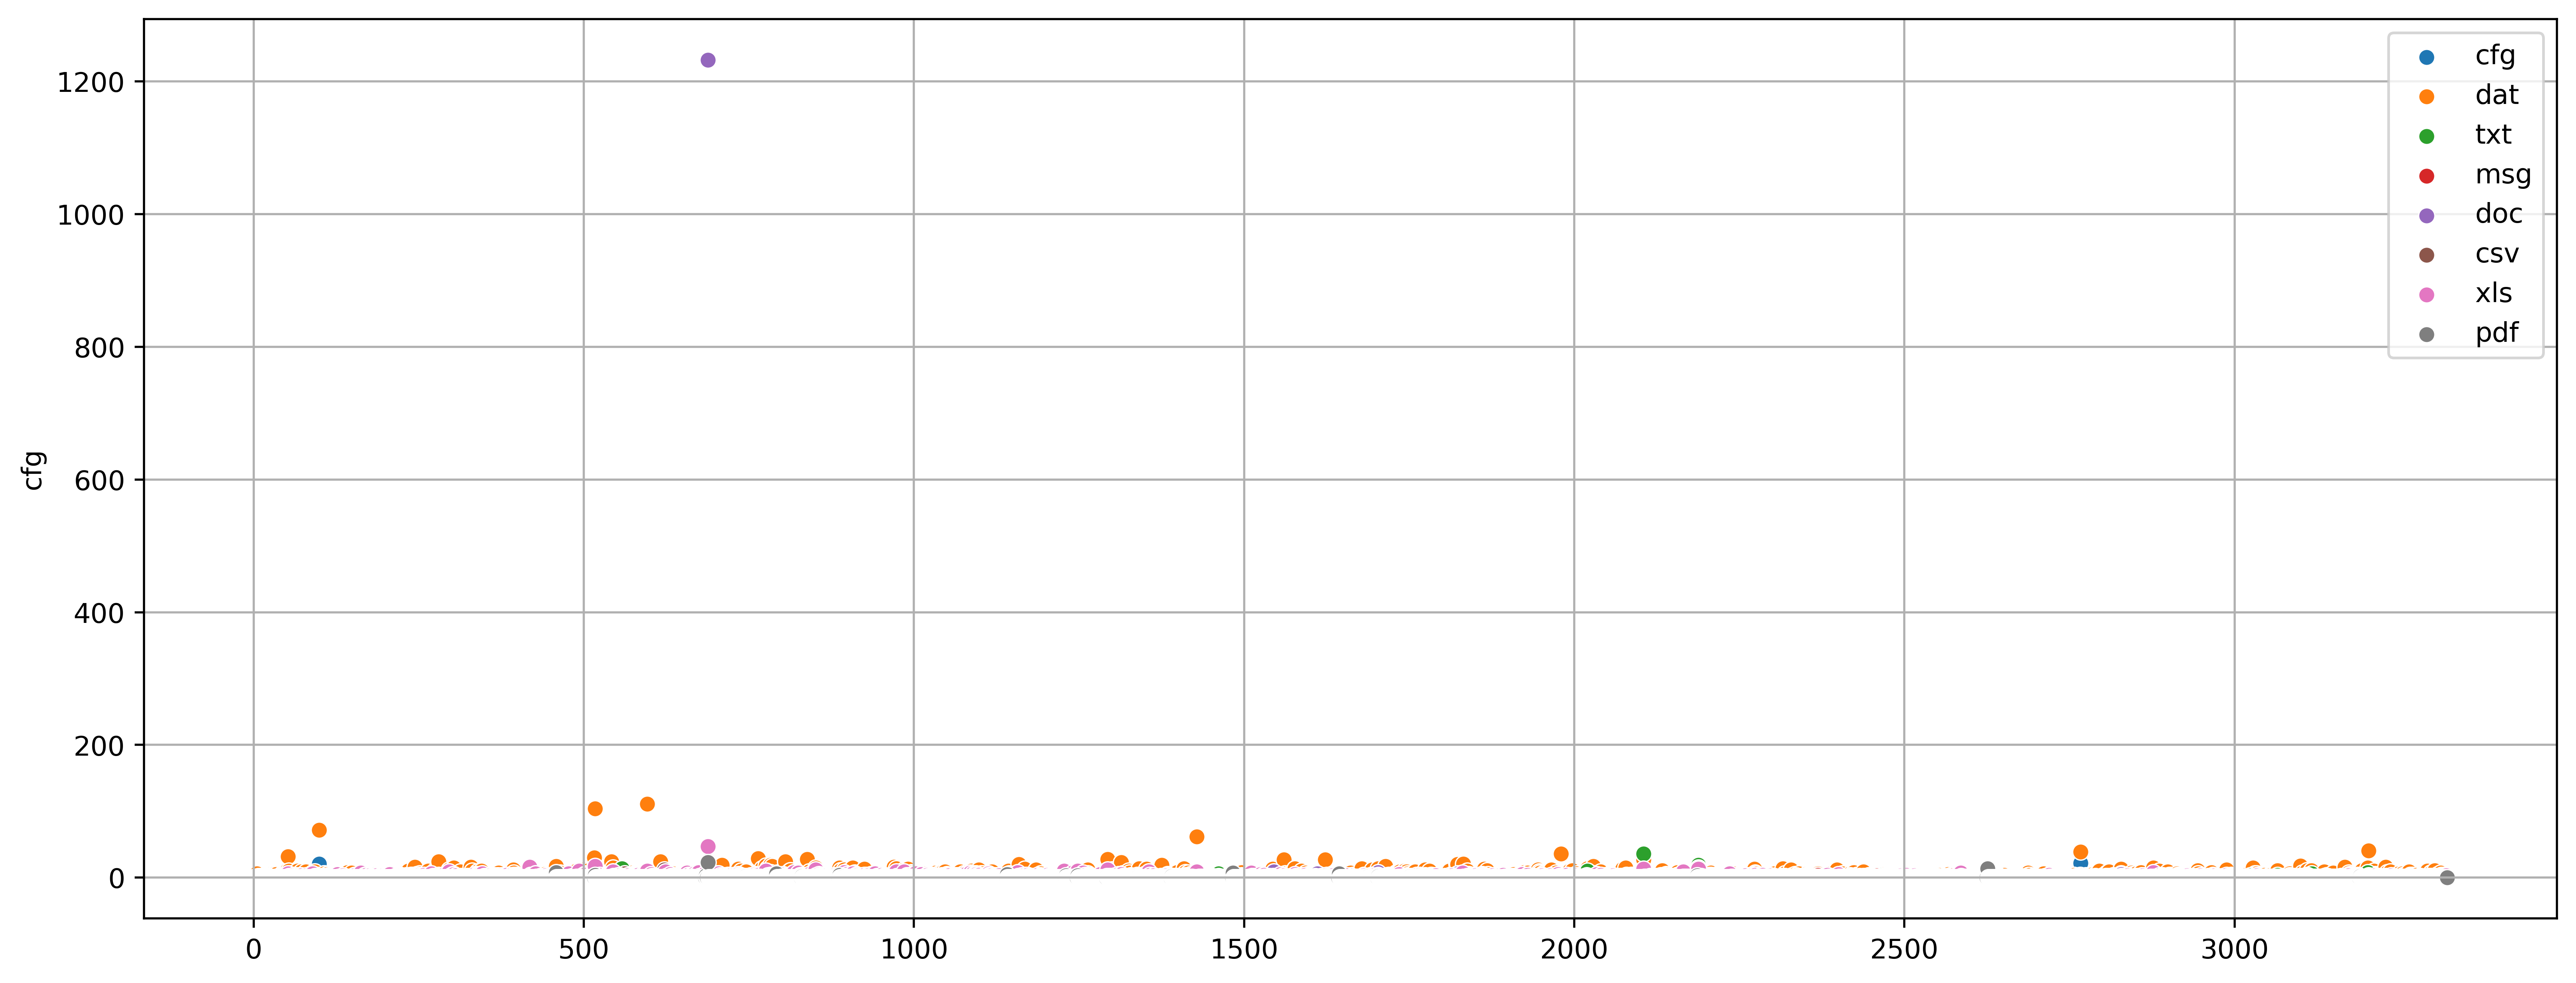

In [16]:
plt.figure(dpi=500, figsize=(16,6))
keys_2 = ["cfg", "dat", "txt", "msg", "doc", "csv", "xls", "pdf"]

for key in keys_2:
    sns.scatterplot(data=df, x=range(len(df)), y=key, label=key)
plt.grid()

In [17]:
df[df["doc"] > 100]

,,cfg,dat,txt,msg,doc,csv,xls,pdf
Year,Folder,,,,,,,,
2012,Historico Informes,1,1,15,7,1232,0,47,23


In [18]:
df = df.drop(("2012", "Historico Informes"))

In [19]:
df

cfg  dat  txt  msg  doc  csv  xls  pdf
Year Folder                                                 
2010 01_05 ara tgo      2    2    0    0    0    0    0    0
     01_06 pay cur      3    3    0    0    0    0    0    0
     01_09 lib col      1    1    0    0    0    0    0    0
     01_10 pay sal      1    1    0    0    0    0    0    0
     01_10BIF_MIN       1    1    0    0    0    0    1    0
...                   ...  ...  ...  ...  ...  ...  ...  ...
2023 04_27 BOB YOU 2    4    4    1    0    0    0    0    0
     04_28 FLO MVA 2    4    4    1    0    0    0    0    0
     04_30 PA5_MA5      1    1    2    1    1    0    3    0
     04_30 PAY-YOU 1    2    2    1    0    0    0    0    0
     ROOT               0    0    0    0    2    0    0    0

[3322 rows x 8 columns]

Text(0, 0.5, 'Count')

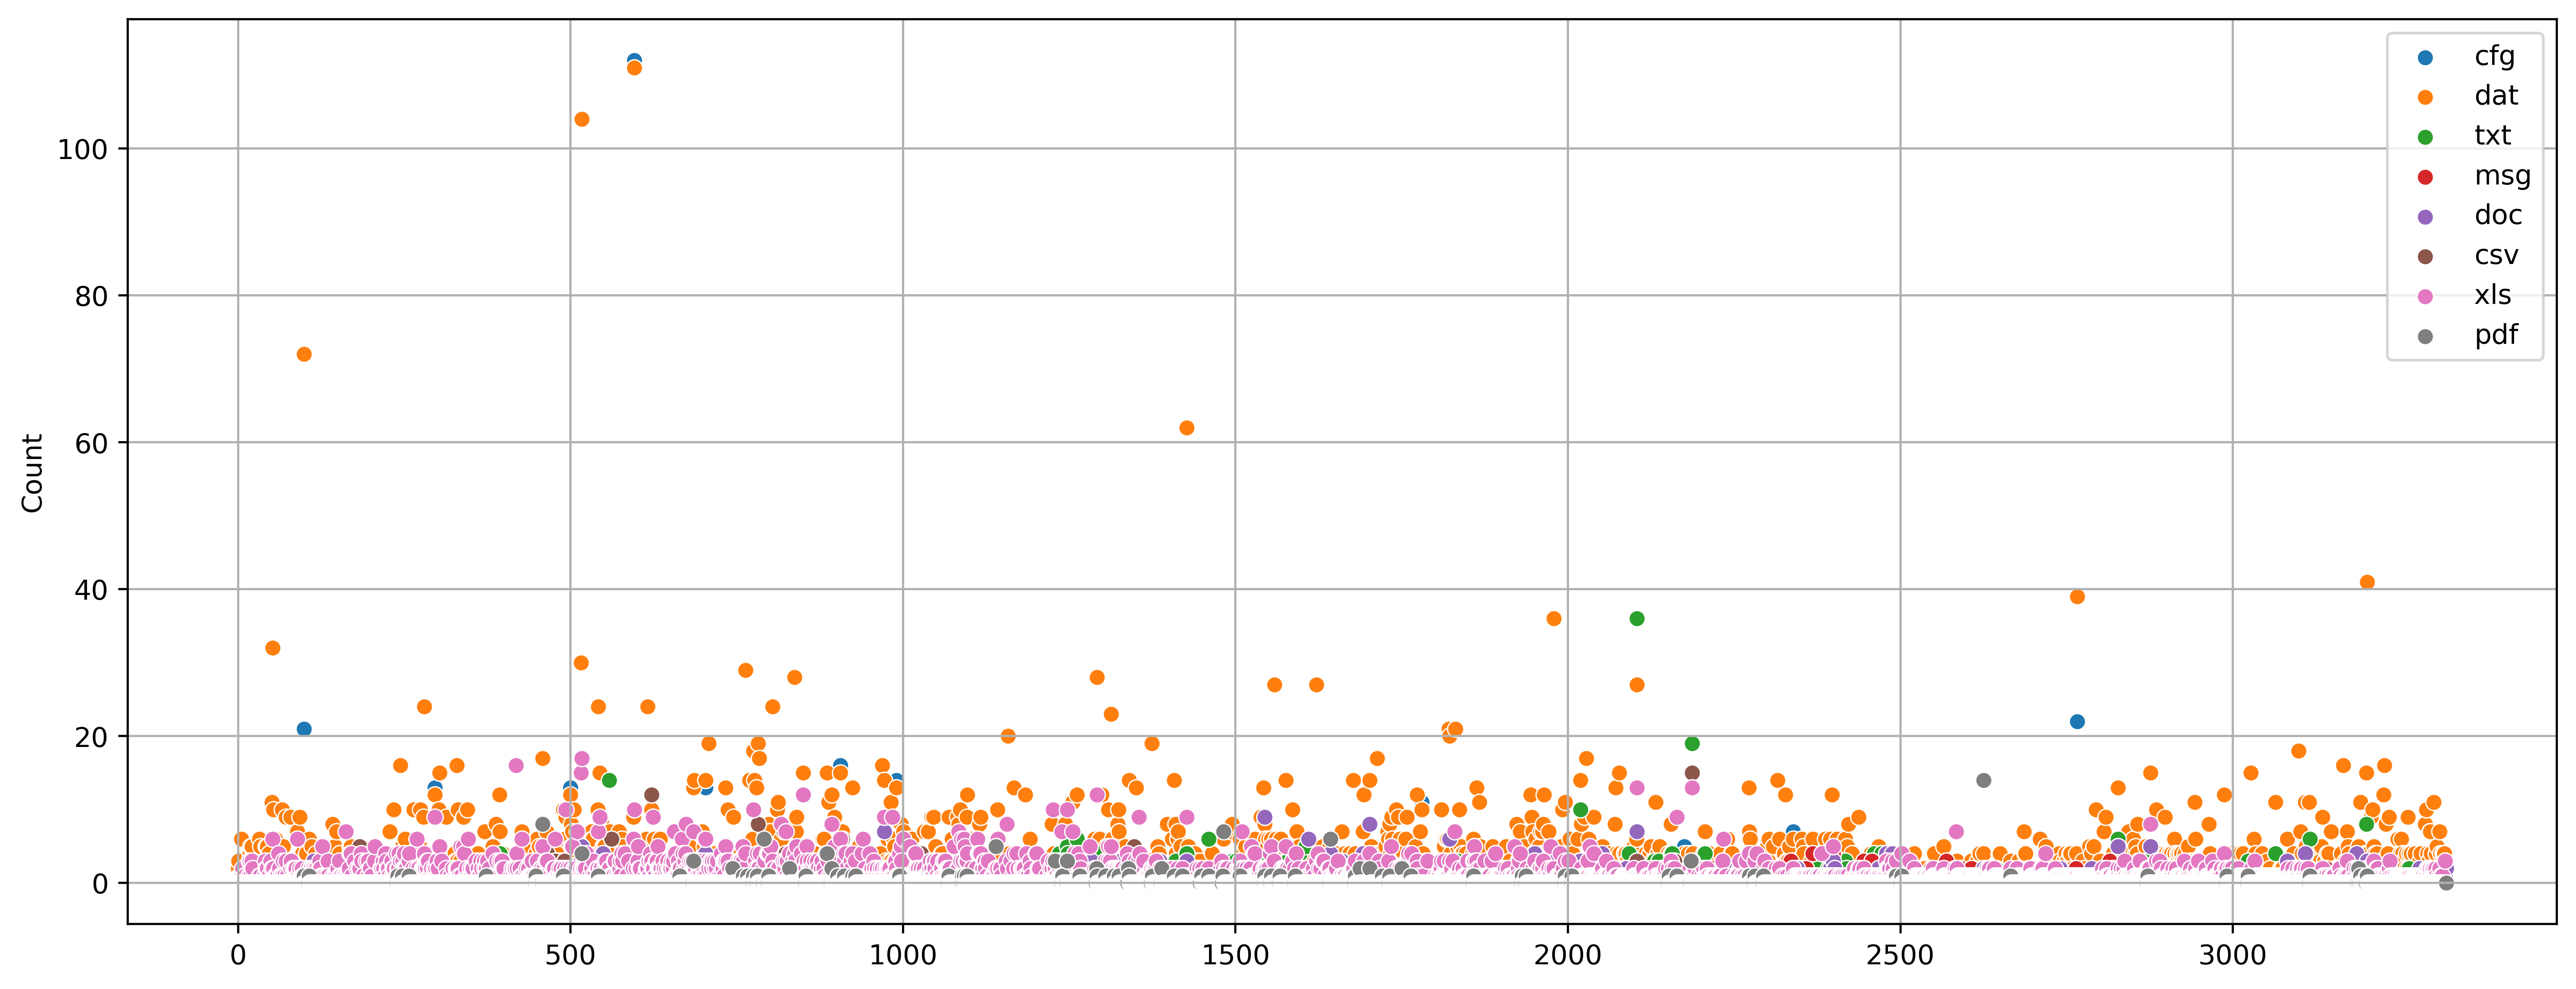

In [20]:
plt.figure(dpi=500, figsize=(16,6))
keys_2 = ["cfg", "dat", "txt", "msg", "doc", "csv", "xls", "pdf"]

for key in keys_2:
    sns.scatterplot(data=df, x=range(len(df)), y=key, label=key)
plt.grid()
plt.ylabel("Count")

In [21]:
df[keys_2].sum()

cfg    7490
dat    7547
txt    1500
msg     345
doc     740
csv     184
xls    3707
pdf     155
dtype: int64

In [22]:
df.index.get_level_values(1)

Index(['01_05 ara tgo', '01_06 pay cur', '01_09 lib col', '01_10 pay sal',
       '01_10BIF_MIN', '01_12 TAC RIV', '01_12 mal', '01_15 MVA',
       '01_15 bon you', '01_16 mal',
       ...
       '04_21 SUA', '04_23 COL PPE', '04_23 PAY YOU 1', '04_26 PMP TAB',
       '04_27 BOB YOU 1', '04_27 BOB YOU 2', '04_28 FLO MVA 2',
       '04_30 PA5_MA5', '04_30 PAY-YOU 1', 'ROOT'],
      dtype='object', name='Folder', length=3322)